<a href="https://colab.research.google.com/github/sarahrdk/EscapeEarth/blob/main/Interns/Sarah/OpeningAndPlotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install lightkurve
import lightkurve as lk
import numpy as np
import pandas as pd 

In [ ]:
!ls /content/gdrive/My\ Drive/EscapeEarthData
#/content/gdrive/My\ Drive/EscapeEarthData/Sec14_cleaned/{ticid}/lc.fits
#/content/gdrive/My\ Drive/EscapeEarthData/Sec15_cleaned/{ticid}/lc.fits

#/content/gdrive/My\ Drive/EscapeEarthData/all_targets_S014_v1.csv

1161345_lc.csv	all_targets_S014_v1.csv  Sec14_cleaned	    TeamB
1573836_lc.csv	bls_powers.npy		 Sec15_cleaned
2161623_lc.csv	bls_rps.npy		 Sector_14_rawdata
Activity-2	DaniellesTEST		 TeamA


In [ ]:
target_list = pd.read_csv("/content/gdrive/My Drive/EscapeEarthData/all_targets_S014_v1.csv",skiprows=5)
target_list

,TICID,Camera,CCD,Tmag,RA,Dec
0,7582594,2,3,8.57,272.3966,45.8308
1,7582633,2,3,9.92,272.3288,45.9244
2,7582634,2,3,10.48,272.3307,45.9255
3,7583285,2,2,11.30,272.3711,47.2259
4,7584049,2,2,8.50,272.5282,47.0887
...,...,...,...,...,...,...
19995,1980752885,2,1,16.91,303.1632,60.2862
19996,1980968952,2,1,8.65,301.3995,63.7061
19997,1980968953,2,1,8.76,301.3993,63.7056
19998,1981207128,2,1,7.88,300.4913,65.8903


In [ ]:
first_ticid = 7582633
#/content/gdrive/My\ Drive/EscapeEarthData/Sec14_cleaned/{ticid}/lc.fits

first_lc = lk.open("/content/gdrive/My Drive/EscapeEarthData/Sec14_cleaned/{}/lc.fits".format(first_ticid))
first_lc 

TessLightCurveFile(TICID: None)

In [ ]:
lc = first_lc.FLUX
lc

TessLightCurve(TICID: None)

In [ ]:
lc.time

array([1683.35583852, 1683.35722739, 1683.35861626, ..., 1707.64703174,
       1707.6484206 , 1707.64980946])

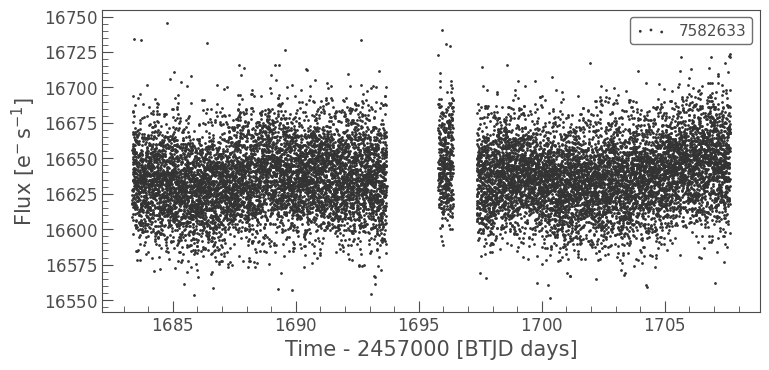

In [ ]:
lc.scatter()

In [ ]:
def open_lc(ticid, sector): 
  try:
    lc_file = lk.open("/content/gdrive/My Drive/EscapeEarthData/Sec{}_cleaned/{}/lc.fits".format(sector, ticid))
    lc = lc_file.FLUX
  except FileNotFoundError:
    lc = "None"
    pass
  return lc

In [ ]:
test_lc = open_lc(first_ticid, 14)
test_lc

TessLightCurve(TICID: None)

In [ ]:
tes2_lc = open_lc(7582594, 14)
tes2_lc

'None'

In [ ]:
def plot (id, sec):
    def open_lc(id,sec):
      try:
        lc_file = lk.open("/content/gdrive/My Drive/EscapeEarthData/Sec{}_cleaned/{}/lc.fits".format(sec, id))
        lc = lc_file.FLUX
      except FileNotFoundError:
        lc = "None"
        pass

    return lc.plot()


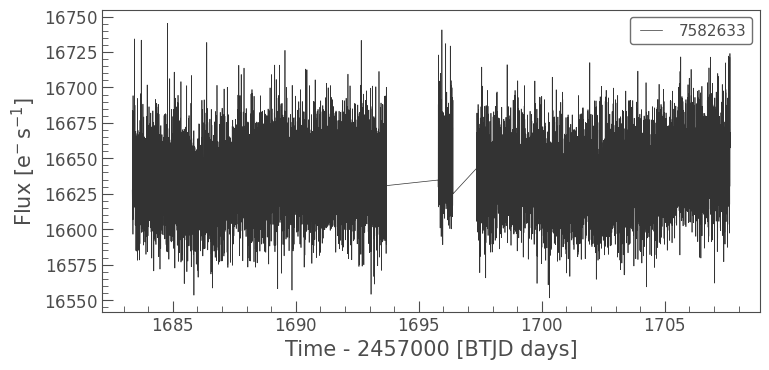

In [ ]:
plot(7584049,14)

# New Internship Starting Point

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install lightkurve
import lightkurve as lk
import numpy as np
import pandas as pd
import glob

In [3]:
# one function to open raw OR cleaned data
## fcn for raw data only
def open_raw_lc(ticid,sector):
  try:
    filename = glob.glob('/content/gdrive/My Drive/EscapeEarthData/Sector_{}_rawdata/*{}-*-s_lc.fits'.format(sector,ticid))
    lc_file = lk.open(filename[0])
    lc = lc_file.PDCSAP_FLUX
  except IndexError:
    lc = "None"
    pass
  return lc
## fcn for cleaned data only
def open_clean_lc(ticid,sector):
  try:
    lc_file = lk.open('/content/gdrive/My Drive/EscapeEarthData/Sec{}_cleaned/{}/lc.fits'.format(sector, ticid))
    lc = lc_file.FLUX
  except FileNotFoundError:
    lc = "None"
    pass
  return lc
##combined function for cleaned or raw
def open_lc(ticid,sector,stage):
  if stage == 'raw':
    lc = open_raw_lc(ticid,sector)
  elif stage == 'clean':
    lc = open_clean_lc(ticid,sector)
  else:
    print('stage parameter not understood; valid entries include: "raw" or "clean"')
  return lc

In [4]:
# open dataframe of target info to get tic ids
target14_list =  pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/all_targets_S014_v1.csv',skiprows=5)
target15_list = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/all_targets_S015_v1.csv',skiprows=5)
target15_list

,TICID,Camera,CCD,Tmag,RA,Dec
0,10747057,4,1,8.93,212.3885,53.8912
1,10757120,1,2,13.57,303.6666,41.8261
2,10759029,1,2,13.87,303.7226,41.3383
3,10849428,1,2,12.99,303.7143,39.9199
4,10856385,1,2,14.00,303.6650,38.8385
...,...,...,...,...,...,...
19995,2005005557,1,4,9.78,325.0506,37.0564
19996,2005271830,1,1,8.26,326.6064,39.8506
19997,2006808209,1,4,16.85,320.6398,36.1249
19998,2017203852,2,4,17.13,321.4574,52.5245


In [7]:
# each sector's list of tic ids
raw15_tics = [10757120, 10759029, 10849428, 10856385, 10984531]
raw14_tics = [7582633, 7582634, 7583285, 7618785, 7620704]
clean15_tics = target15_list['TICID'].to_numpy()
clean14_tics = target14_list['TICID'].to_numpy()
# open one target's lightcurve
lc = open_lc(raw14_tics[0],14,'clean')
lc

TessLightCurve(TICID: None)

ploting the cleaned lightkurve

In [9]:
import matplotlib.pyplot as plt

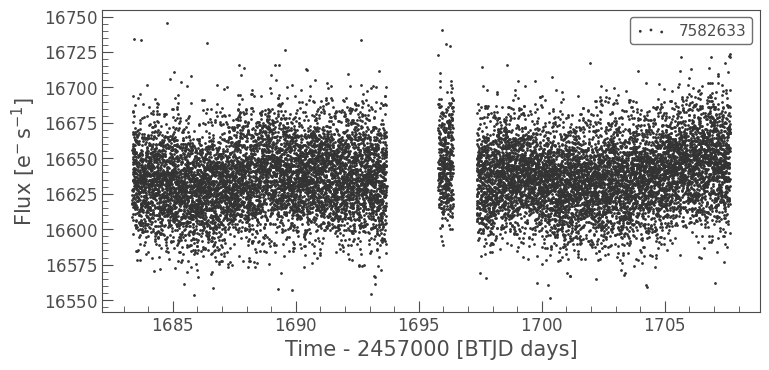

In [11]:
lc.scatter()